# Imports and setup

### Auto-re-import python modules, useful for editing local fils

In [1]:
%load_ext autoreload
%autoreload 2

## Imports

In [2]:
import itertools

import matplotlib as mpl
import pandas as pd
import seaborn as sns

mpl.rcParams["figure.max_open_warning"] = 0

# Read in data

In [3]:
outdir = (
    "s3://seanome-kmerseek/scope-benchmark/pipeline-outputs/2024-10-08__protein_k5-20"
)
! aws s3 ls $outdir/

                           PRE multiqc/
                           PRE pipeline_info/
                           PRE seqkit/
                           PRE sourmash/


In [4]:
! aws s3 ls $outdir/sourmash/

                           PRE multisearch/
                           PRE sigs/


In [5]:
! aws s3 ls --human-readable $outdir/sourmash/multisearch/

2024-10-09 13:29:03    0 Bytes 
2024-10-09 03:28:12    6.0 MiB astral-scopedom-seqres-gd-sel-gs-bib-40-2.08.part_001.fa--in--astral-scopedom-seqres-gd-sel-gs-bib-40-2.08.part_001.fa.protein.10.multisearch.csv
2024-10-09 06:17:15    5.7 MiB astral-scopedom-seqres-gd-sel-gs-bib-40-2.08.part_001.fa--in--astral-scopedom-seqres-gd-sel-gs-bib-40-2.08.part_001.fa.protein.11.multisearch.csv
2024-10-09 04:22:24    5.5 MiB astral-scopedom-seqres-gd-sel-gs-bib-40-2.08.part_001.fa--in--astral-scopedom-seqres-gd-sel-gs-bib-40-2.08.part_001.fa.protein.12.multisearch.csv
2024-10-09 08:07:15    5.5 MiB astral-scopedom-seqres-gd-sel-gs-bib-40-2.08.part_001.fa--in--astral-scopedom-seqres-gd-sel-gs-bib-40-2.08.part_001.fa.protein.13.multisearch.csv
2024-10-09 07:10:35    5.4 MiB astral-scopedom-seqres-gd-sel-gs-bib-40-2.08.part_001.fa--in--astral-scopedom-seqres-gd-sel-gs-bib-40-2.08.part_001.fa.protein.14.multisearch.csv
2024-10-09 12:35:34    5.4 MiB astral-scopedom-seqres-gd-sel-gs-bib-40-2.08.part_00

In [6]:
multisearch = pd.read_csv(
    f"{outdir}/sourmash/multisearch/astral-scopedom-seqres-gd-sel-gs-bib-40-2.08.part_001.fa--in--astral-scopedom-seqres-gd-sel-gs-bib-40-2.08.part_001.fa.protein.10.multisearch.csv"
)
print(multisearch.shape)
multisearch.head()

(16725, 13)


,query_name,query_md5,match_name,match_md5,containment,max_containment,jaccard,intersect_hashes,prob_overlap,prob_overlap_adjusted,containment_adjusted,containment_adjusted_log10,tf_idf_score
0,d4j42a_ a.25.3.0 (A:) automated matches {Bacil...,7b293810423d129c1c6e932adbacc00d,d4j42a_ a.25.3.0 (A:) automated matches {Bacil...,7b293810423d129c1c6e932adbacc00d,1.0,1.0,1.000000,71.0,9.971266e-12,0.002297,435.389380,2.638878,9.934455
1,d3gcea_ b.33.1.0 (A:) automated matches {Nocar...,0be9ab661c03aab8b73841b2727198c4,d3gcea_ b.33.1.0 (A:) automated matches {Nocar...,0be9ab661c03aab8b73841b2727198c4,1.0,1.0,1.000000,95.0,1.334183e-11,0.003073,325.396274,2.512413,9.934455
2,d1dlwa_ a.1.1.1 (A:) Protozoan/bacterial hemog...,d7880d90a67ec70b21f3f15b43a8051d,d1dlwa_ a.1.1.1 (A:) Protozoan/bacterial hemog...,d7880d90a67ec70b21f3f15b43a8051d,1.0,1.0,1.000000,107.0,1.502712e-11,0.003461,288.903234,2.460752,9.934455
3,d3tewa2 b.179.1.1 (A:15-225) PA14 {Bacillus an...,1b36b1ba7e30ace7d13c10010c4314b8,d3tewa2 b.179.1.1 (A:15-225) PA14 {Bacillus an...,1b36b1ba7e30ace7d13c10010c4314b8,1.0,1.0,1.000000,202.0,4.648576e-11,0.010708,93.391680,1.970308,9.848143
4,d3j9ca1 b.179.1.1 (A:174-225) PA14 {Bacillus a...,95b4a9065fa94dbfba9f10f72beb90df,d3tewa2 b.179.1.1 (A:15-225) PA14 {Bacillus an...,1b36b1ba7e30ace7d13c10010c4314b8,1.0,1.0,0.212871,43.0,2.415574e-11,0.005564,179.724686,2.254608,9.528990


# Make some plots!

In [7]:
value_cols = multisearch.columns[multisearch.dtypes == float]
value_cols

Index(['containment', 'max_containment', 'jaccard', 'intersect_hashes',
       'prob_overlap', 'prob_overlap_adjusted', 'containment_adjusted',
       'containment_adjusted_log10', 'tf_idf_score'],
      dtype='object')

## Histogram of distributions for each

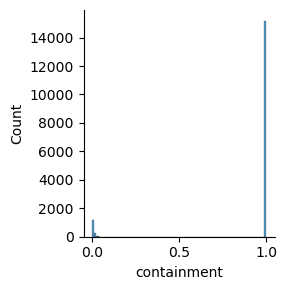

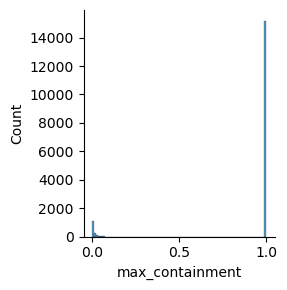

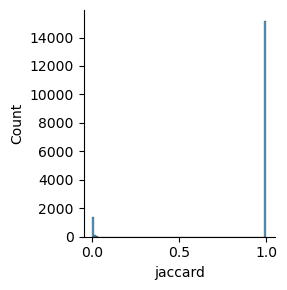

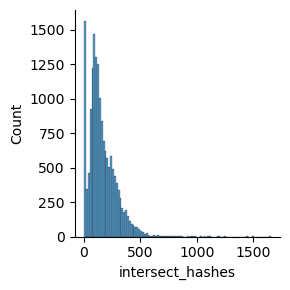

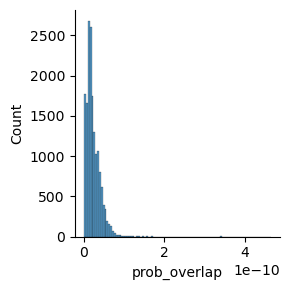

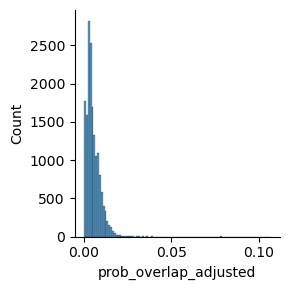

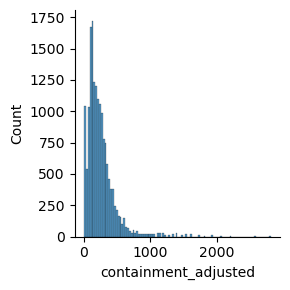

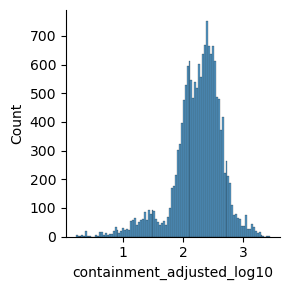

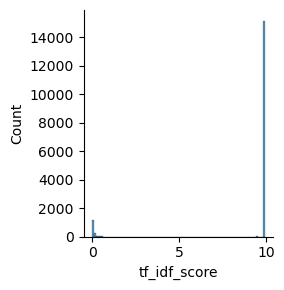

In [8]:
for value_col in value_cols:
    sns.displot(multisearch, x=value_col, bins=100, height=3)

## Histogram of distributions for each

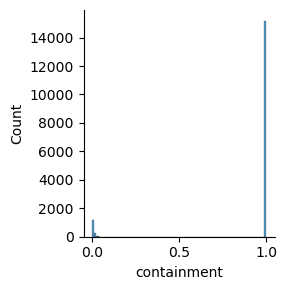

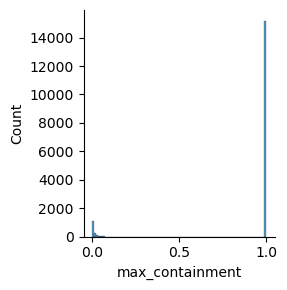

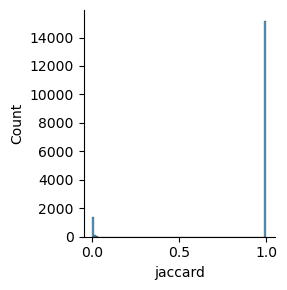

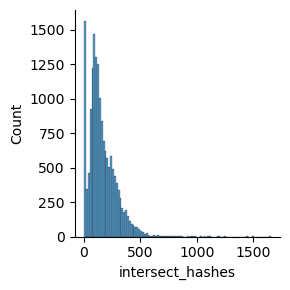

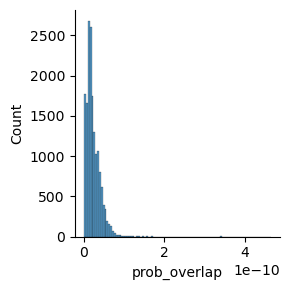

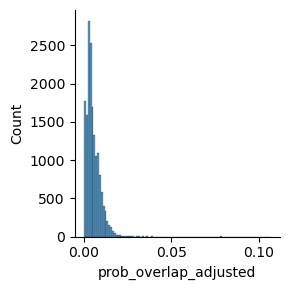

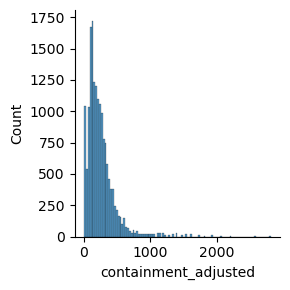

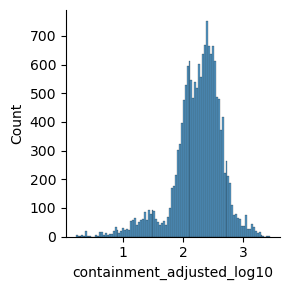

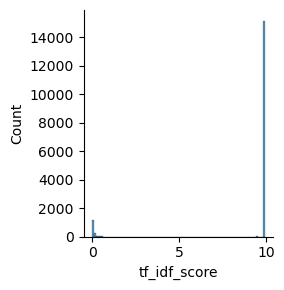

In [9]:
for value_col in value_cols:
    sns.displot(multisearch, x=value_col, bins=100, height=3)

## Jointplots to show relationships of each

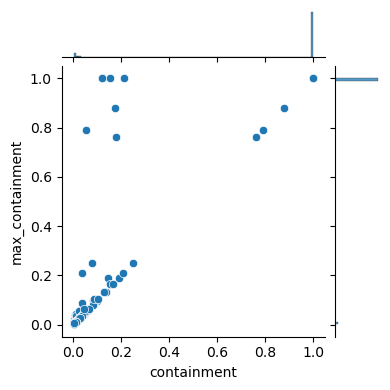

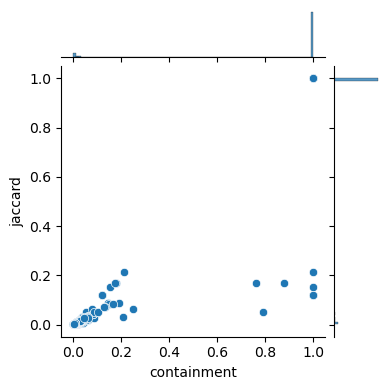

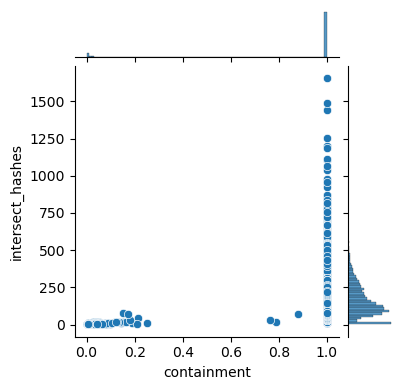

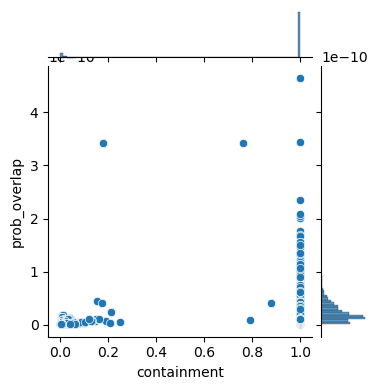

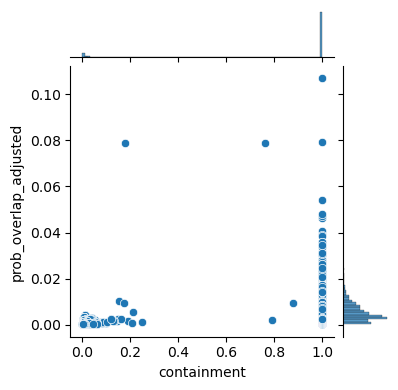

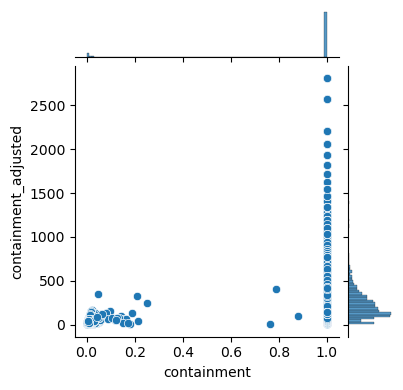

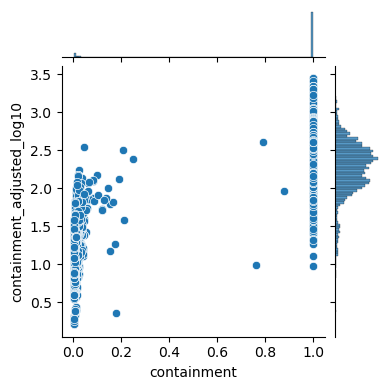

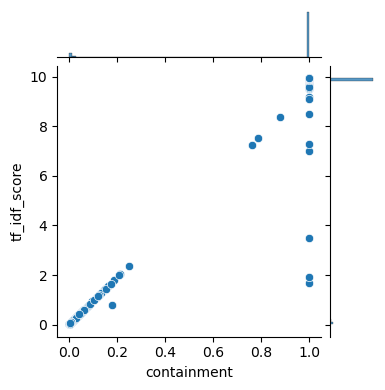

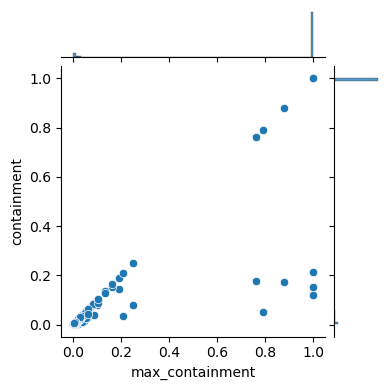

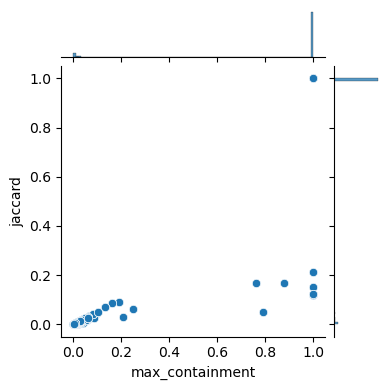

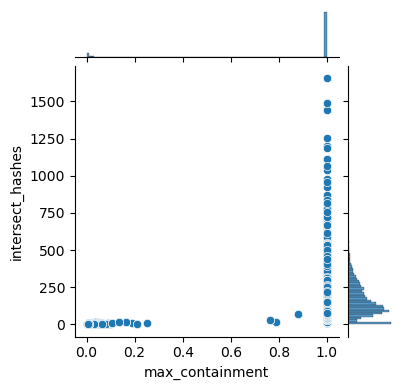

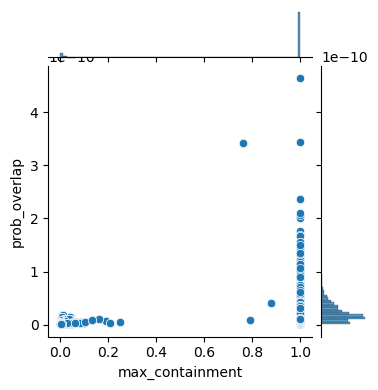

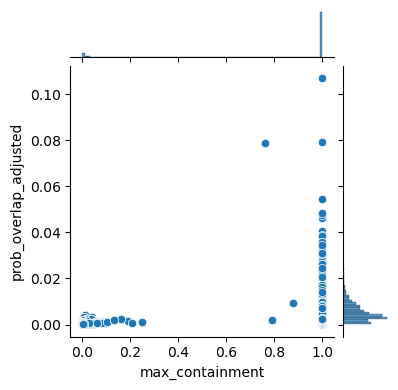

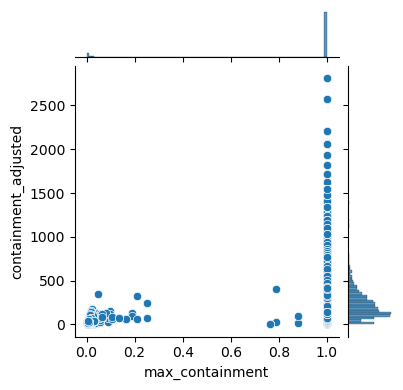

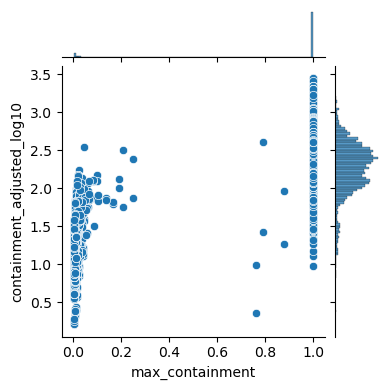

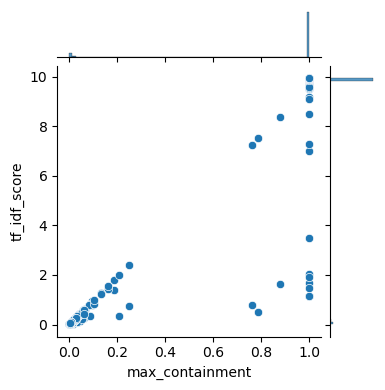

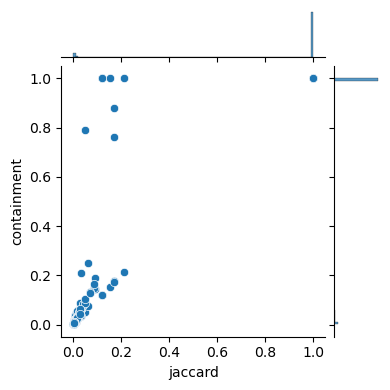

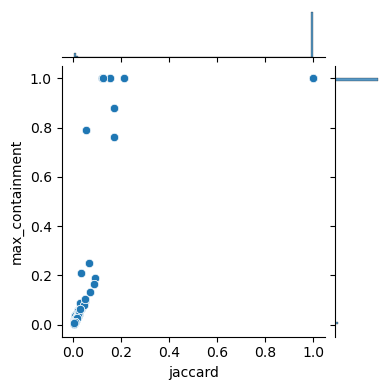

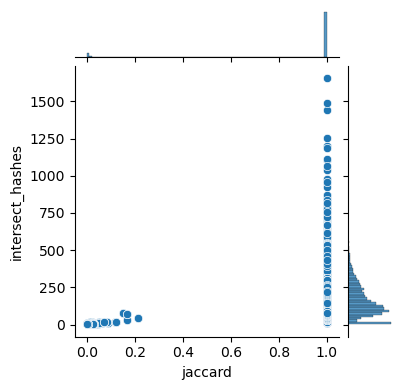

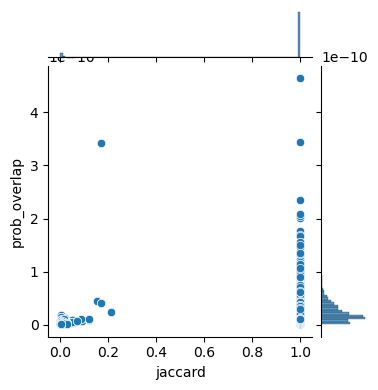

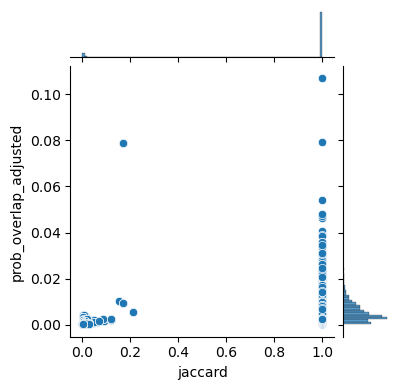

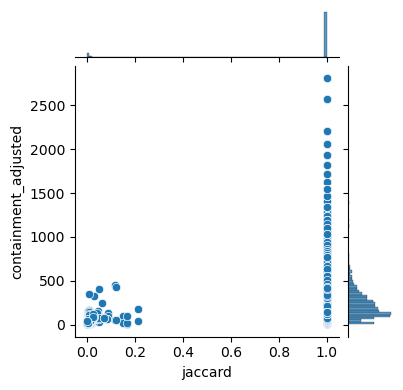

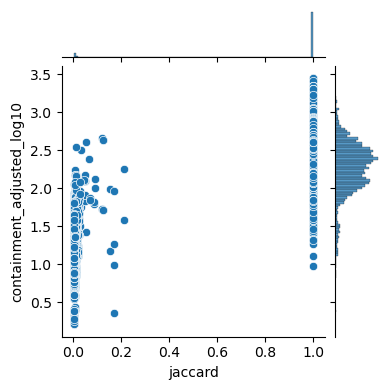

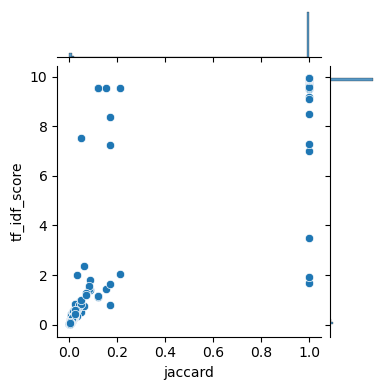

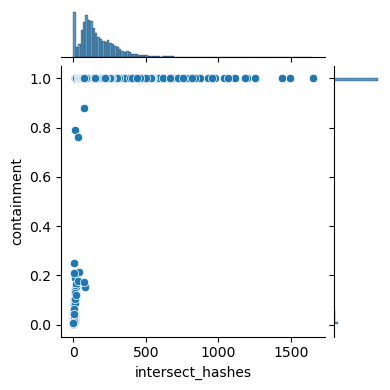

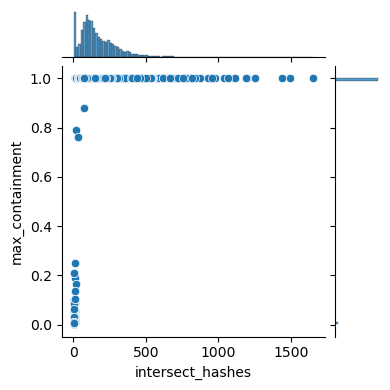

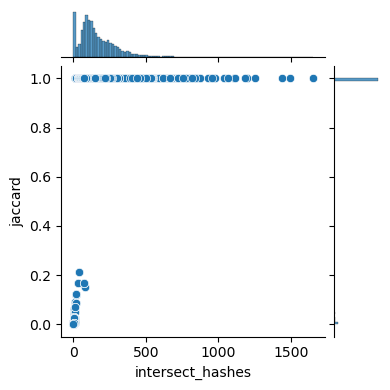

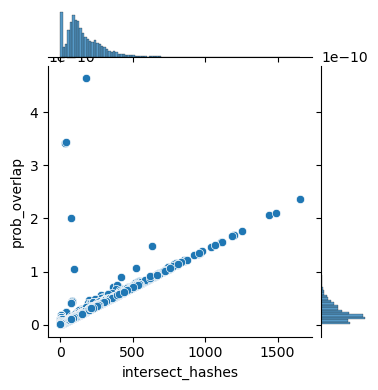

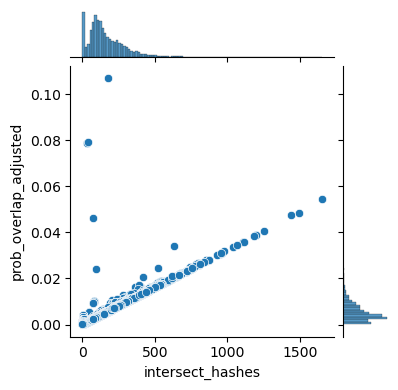

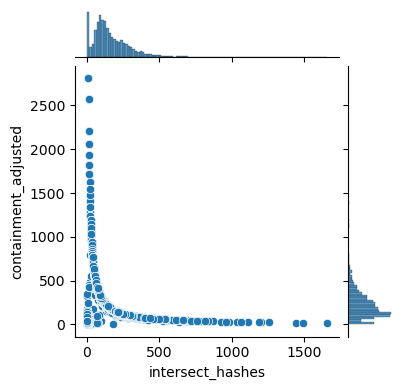

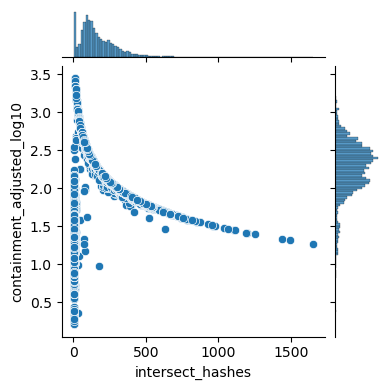

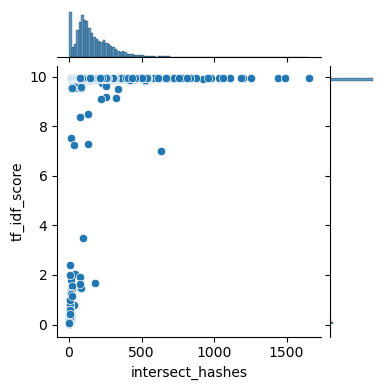

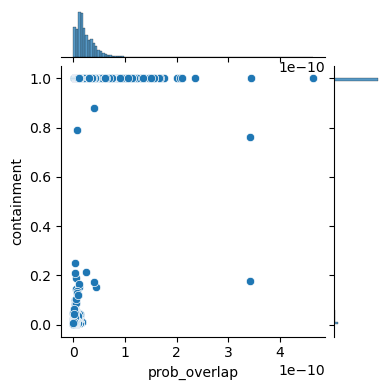

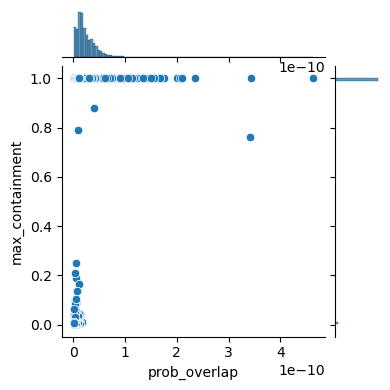

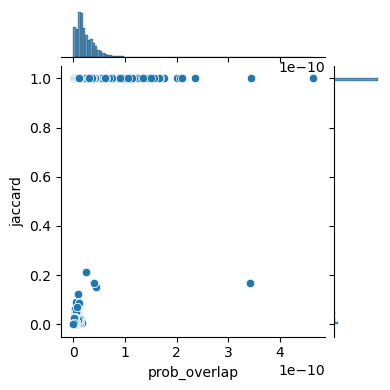

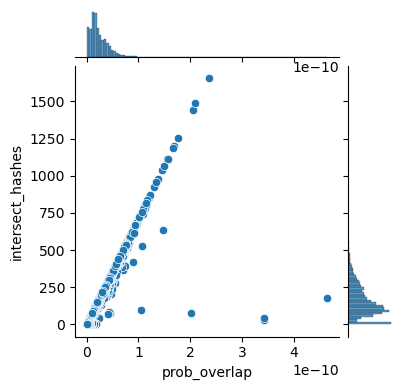

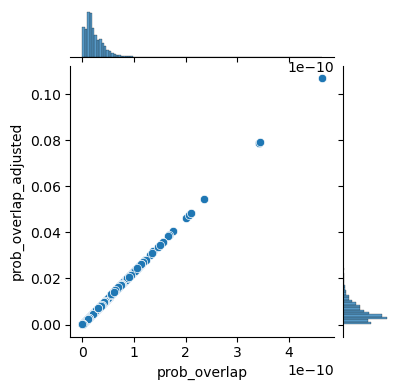

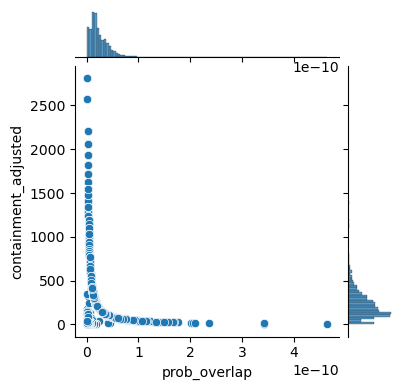

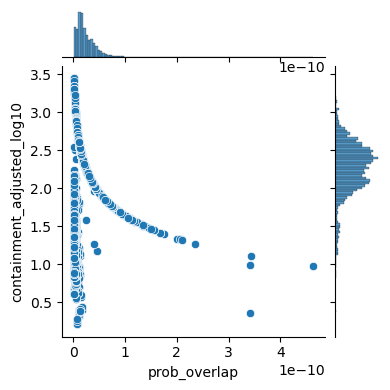

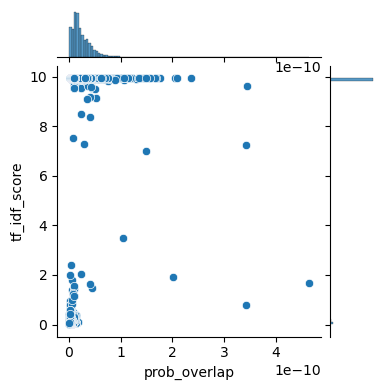

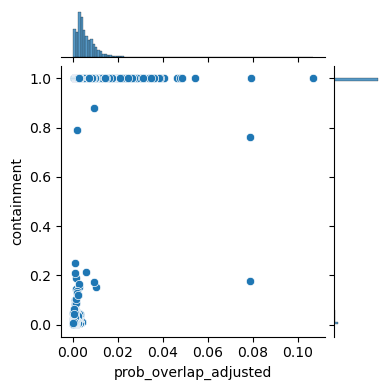

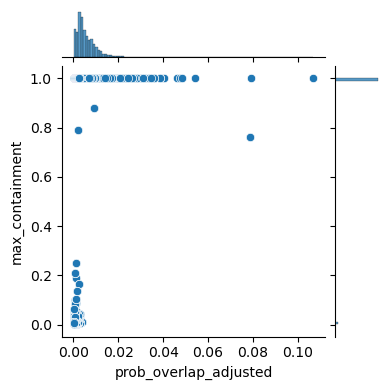

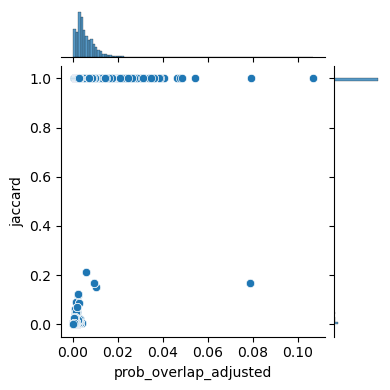

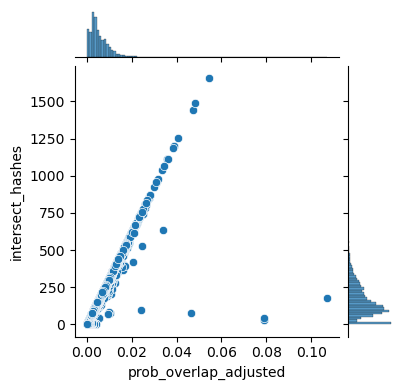

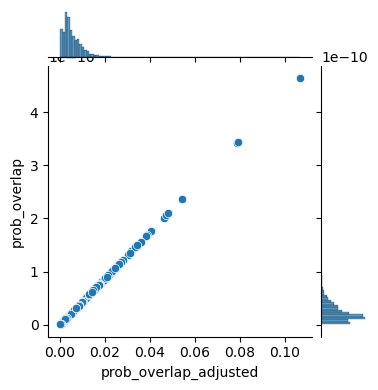

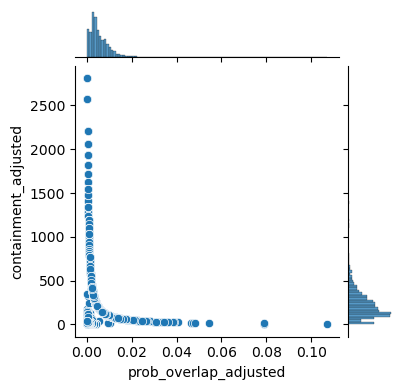

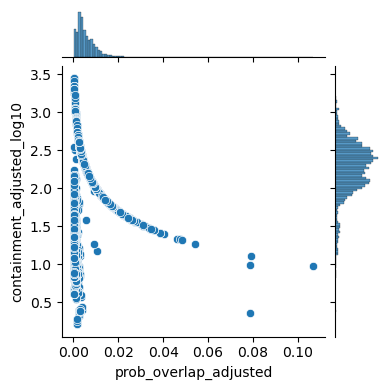

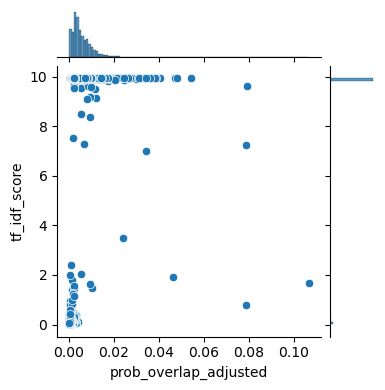

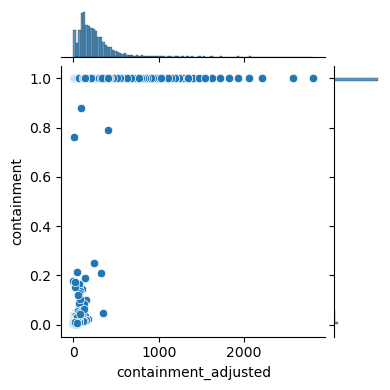

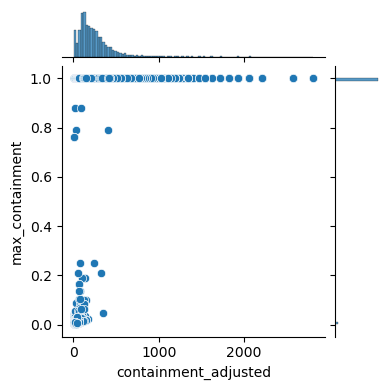

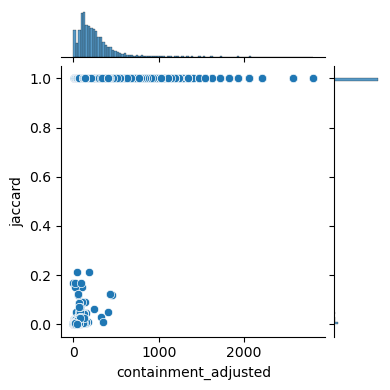

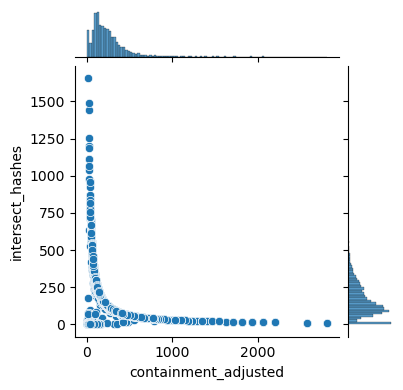

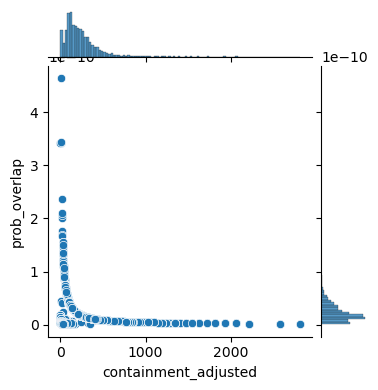

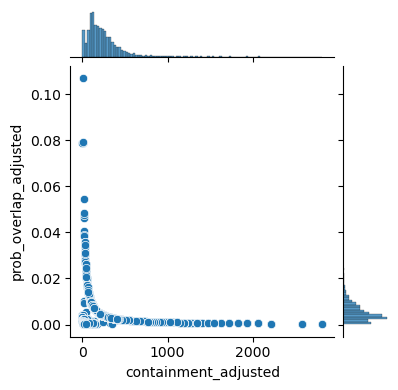

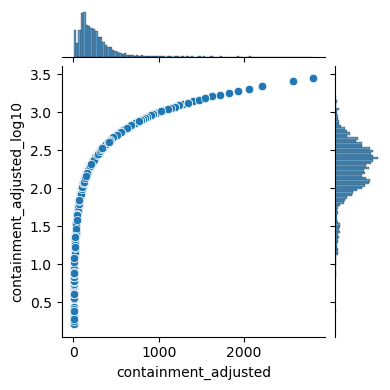

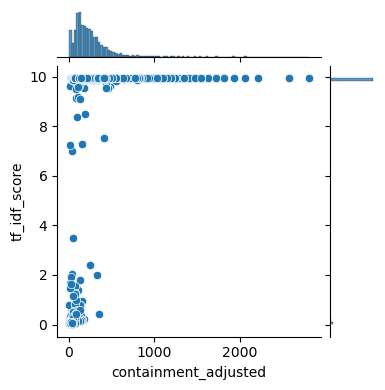

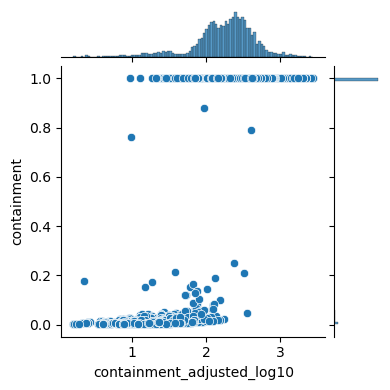

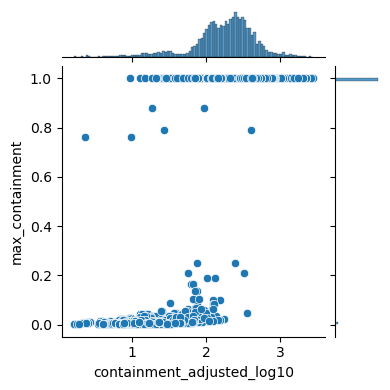

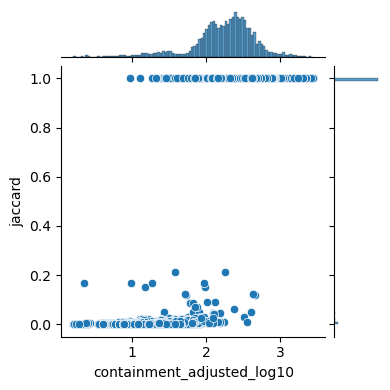

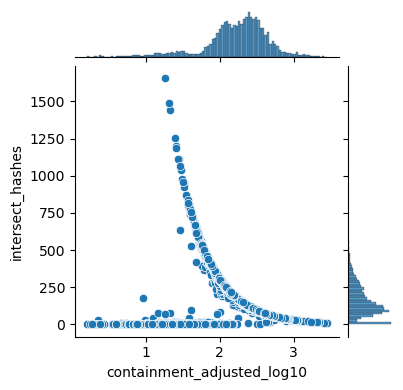

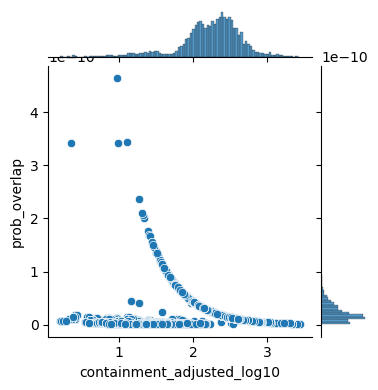

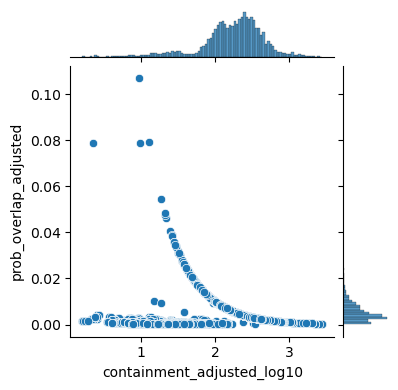

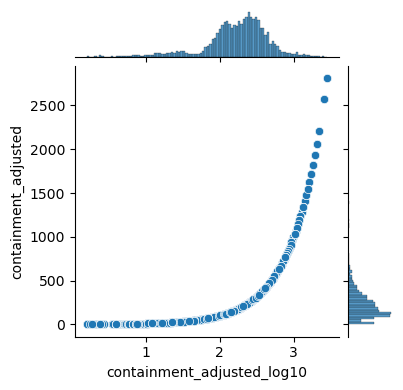

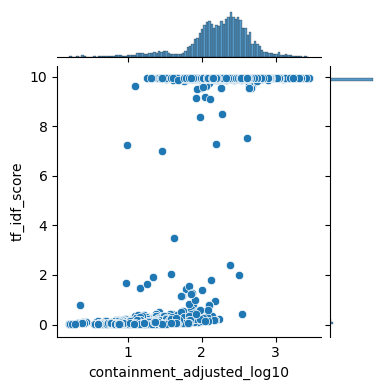

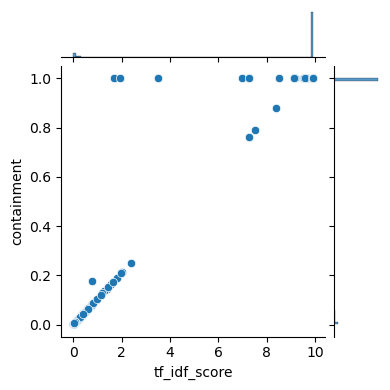

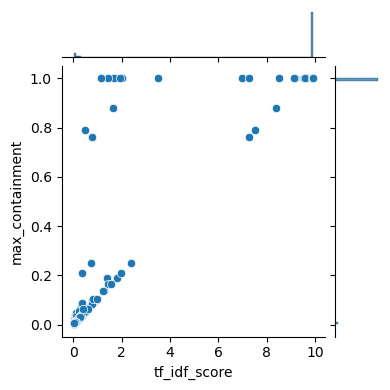

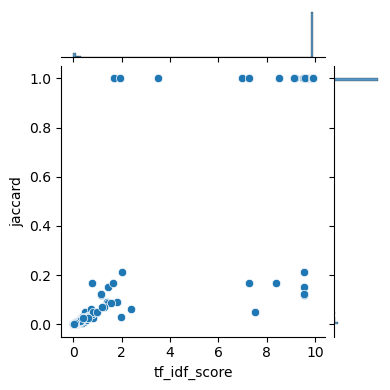

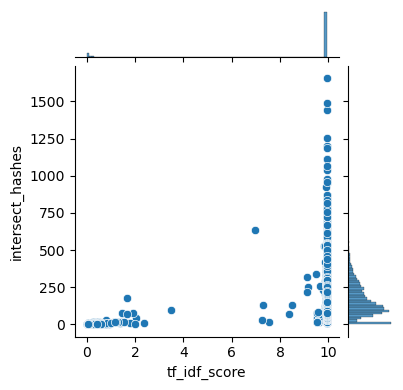

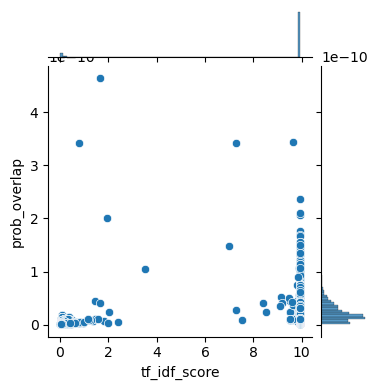

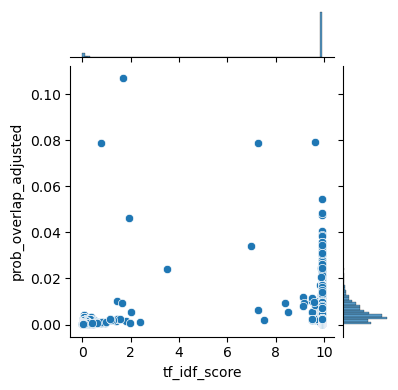

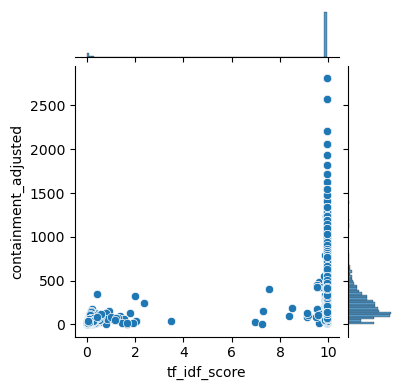

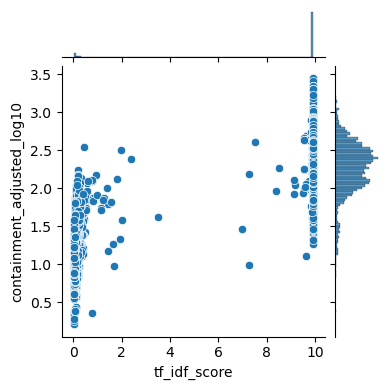

In [10]:
for col1, col2 in itertools.permutations(value_cols, 2):
    sns.jointplot(multisearch, x=col1, y=col2, marginal_kws=dict(bins=100), height=4)

 # Compute benchmarking!

In [11]:
multisearch.head()

,query_name,query_md5,match_name,match_md5,containment,max_containment,jaccard,intersect_hashes,prob_overlap,prob_overlap_adjusted,containment_adjusted,containment_adjusted_log10,tf_idf_score
0,d4j42a_ a.25.3.0 (A:) automated matches {Bacil...,7b293810423d129c1c6e932adbacc00d,d4j42a_ a.25.3.0 (A:) automated matches {Bacil...,7b293810423d129c1c6e932adbacc00d,1.0,1.0,1.000000,71.0,9.971266e-12,0.002297,435.389380,2.638878,9.934455
1,d3gcea_ b.33.1.0 (A:) automated matches {Nocar...,0be9ab661c03aab8b73841b2727198c4,d3gcea_ b.33.1.0 (A:) automated matches {Nocar...,0be9ab661c03aab8b73841b2727198c4,1.0,1.0,1.000000,95.0,1.334183e-11,0.003073,325.396274,2.512413,9.934455
2,d1dlwa_ a.1.1.1 (A:) Protozoan/bacterial hemog...,d7880d90a67ec70b21f3f15b43a8051d,d1dlwa_ a.1.1.1 (A:) Protozoan/bacterial hemog...,d7880d90a67ec70b21f3f15b43a8051d,1.0,1.0,1.000000,107.0,1.502712e-11,0.003461,288.903234,2.460752,9.934455
3,d3tewa2 b.179.1.1 (A:15-225) PA14 {Bacillus an...,1b36b1ba7e30ace7d13c10010c4314b8,d3tewa2 b.179.1.1 (A:15-225) PA14 {Bacillus an...,1b36b1ba7e30ace7d13c10010c4314b8,1.0,1.0,1.000000,202.0,4.648576e-11,0.010708,93.391680,1.970308,9.848143
4,d3j9ca1 b.179.1.1 (A:174-225) PA14 {Bacillus a...,95b4a9065fa94dbfba9f10f72beb90df,d3tewa2 b.179.1.1 (A:15-225) PA14 {Bacillus an...,1b36b1ba7e30ace7d13c10010c4314b8,1.0,1.0,0.212871,43.0,2.415574e-11,0.005564,179.724686,2.254608,9.528990


In [12]:
multisearch.query_name.head().values

array(['d4j42a_ a.25.3.0 (A:) automated matches {Bacillus anthracis [TaxId: 260799]}',
       'd3gcea_ b.33.1.0 (A:) automated matches {Nocardioides aromaticivorans [TaxId: 200618]}',
       'd1dlwa_ a.1.1.1 (A:) Protozoan/bacterial hemoglobin {Ciliate (Paramecium caudatum) [TaxId: 5885]}',
       'd3tewa2 b.179.1.1 (A:15-225) PA14 {Bacillus anthracis}',
       'd3j9ca1 b.179.1.1 (A:174-225) PA14 {Bacillus anthracis}'],
      dtype=object)

In [13]:
multisearch["query_scop_lineage"] = multisearch.query_name.str.split().str[1]
multisearch["query_scop_lineage"].value_counts()

query_scop_lineage
c.2.1.0      354
c.37.1.0     166
d.144.1.0    150
c.94.1.0     144
c.47.1.0     134
            ... 
d.2.1.5        1
d.58.4.3       1
d.2.1.11       1
a.25.5.1       1
b.1.18.26      1
Name: count, Length: 4703, dtype: int64

In [14]:
multisearch["query_scop_id"] = multisearch.query_name.str.split().str[0]
multisearch["query_scop_id"].value_counts()

query_scop_id
d5u2wa_    9
d3r9ba_    9
d5lvoa_    8
d4rm4a_    8
d4yt3a_    8
          ..
d4i7ga2    1
d2d69a2    1
d2bkaa1    1
d2bc4a2    1
d1r8ha_    1
Name: count, Length: 15177, dtype: int64

### Use regex to extract family information

https://regex101.com/r/gKBJAr/1

In [15]:
pattern = r"(?P<family>(?P<superfamily>(?P<fold>(?P<class>[a-z])\.\d+)\.\d+)\.\d+)"
lineages_extracted = multisearch.query_scop_lineage.str.extractall(pattern)
lineages_extracted = lineages_extracted.droplevel(-1)
print(lineages_extracted.shape)
lineages_extracted.head()

(16725, 4)


,family,superfamily,fold,class
0,a.25.3.0,a.25.3,a.25,a
1,b.33.1.0,b.33.1,b.33,b
2,a.1.1.1,a.1.1,a.1,a
3,b.179.1.1,b.179.1,b.179,b
4,b.179.1.1,b.179.1,b.179,b


## Use fixed SCOP lookup file from Foldseek paper

In [16]:
scop_fixed = pd.read_csv(
    "https://raw.githubusercontent.com/steineggerlab/foldseek-analysis/refs/heads/main/scopbenchmark/data/scop_lookup.fix.tsv",
    sep="\t",
    header=None,
    names=["scop_id", "scop_class"],
    index_col=0,
).squeeze()
print(scop_fixed.shape)
scop_fixed.head()

(11211,)


scop_id
d1dlwa_    a.1.1.1
d2gkma_    a.1.1.1
d2qrwa_    a.1.1.1
d1s69a_    a.1.1.1
d2bkma_    a.1.1.1
Name: scop_class, dtype: object

### See how it differs from what we ahve

In [17]:
scop_original = pd.Series(
    multisearch["query_scop_lineage"].values, index=multisearch["query_scop_id"].values
)
scop_original

d4j42a_     a.25.3.0
d3gcea_     b.33.1.0
d1dlwa_      a.1.1.1
d3tewa2    b.179.1.1
d3j9ca1    b.179.1.1
             ...    
d2hoqa_    c.108.1.0
d1zjja_    c.108.1.0
d3e58a_    c.108.1.0
d2om6a_    c.108.1.0
d4uasa_    c.108.1.0
Length: 16725, dtype: object

In [18]:
scop_original_no_dups = scop_original[~scop_original.index.duplicated()]
scop_original_no_dups

d4j42a_     a.25.3.0
d3gcea_     b.33.1.0
d1dlwa_      a.1.1.1
d3tewa2    b.179.1.1
d3j9ca1    b.179.1.1
             ...    
d3umca1    c.108.1.0
d3vaya_    c.108.1.0
d2hoqa_    c.108.1.0
d2om6a_    c.108.1.0
d4uasa_    c.108.1.0
Length: 15177, dtype: object

In [19]:
scop_fixed

scop_id
d1dlwa_     a.1.1.1
d2gkma_     a.1.1.1
d2qrwa_     a.1.1.1
d1s69a_     a.1.1.1
d2bkma_     a.1.1.1
             ...   
d2fk4a1    g.90.1.1
d2b9da1    g.91.1.1
d2ewla1    g.91.1.1
d2pkgc1    g.92.1.1
d2dkta2    g.93.1.1
Name: scop_class, Length: 11211, dtype: object

### Get intersecting ids

In [20]:
scop_intersection = scop_fixed.index.intersection(scop_original_no_dups.index)
len(scop_intersection)

7058

In [21]:
scop_intersection

Index(['d1dlwa_', 'd2gkma_', 'd2bkma_', 'd1asha_', 'd1ecaa_', 'd1x9fd_',
       'd1x9fc_', 'd1jl7a_', 'd1it2a_', 'd1or4a_',
       ...
       'd2bska1', 'd1vfia1', 'd2d8qa1', 'd1x4sa1', 'd2baia1', 'd2ffta1',
       'd2fk4a1', 'd2b9da1', 'd2ewla1', 'd2pkgc1'],
      dtype='object', length=7058)

In [22]:
scop_original_intersection = scop_original_no_dups[scop_intersection].sort_index()
scop_original_intersection

d12asa_    d.104.1.1
d16vpa_    d.180.1.1
d1914a1     d.49.1.1
d1914a2     d.49.1.1
d1a04a1      a.4.6.2
             ...    
d5ruba2     d.58.9.1
d7a3ha_      c.1.8.3
d7ahla_      f.6.1.1
d7odca1     b.49.2.3
d7odca2      c.1.6.1
Length: 7058, dtype: object

In [23]:
scop_fixed_intersection = scop_fixed[scop_intersection].sort_index()
scop_fixed_intersection

d12asa_    d.104.1.1
d16vpa_    d.180.1.1
d1914a1     d.49.1.1
d1914a2     d.49.1.1
d1a04a1      a.4.6.2
             ...    
d5ruba2     d.58.9.1
d7a3ha_      c.1.8.3
d7ahla_      f.6.1.1
d7odca1     b.49.2.3
d7odca2      c.1.6.1
Name: scop_class, Length: 7058, dtype: object

In [24]:
different = scop_original_intersection != scop_fixed_intersection
different.sum()

np.int64(26)

In [25]:
pd.DataFrame(
    dict(
        scop_original=scop_original_intersection[different],
        scop_fixed=scop_fixed_intersection[different],
    )
)

,scop_original,scop_fixed
d1ayoa_,b.1.29.1,b.2.4.1
d1l2wi_,d.184.1.2,d.198.1.1
d1nqja_,b.18.1.36,b.23.2.1
d1rh5c_,f.17.6.1,f.23.29.1
d1rz4a1,a.4.5.47,a.4.5.53
d1rz4a2,a.118.8.9,a.118.1.18
d1wzla1,b.1.18.0,b.1.18.2
d1wzla2,b.71.1.0,b.71.1.1
d1x1ia2,b.24.1.0,b.24.1.1
d1x1ia3,b.30.5.0,b.30.5.2


## Let's write a function to extract the fixed SCOP id (maybe should be doing this in polars?)

In [26]:
multisearch.query_name

0        d4j42a_ a.25.3.0 (A:) automated matches {Bacil...
1        d3gcea_ b.33.1.0 (A:) automated matches {Nocar...
2        d1dlwa_ a.1.1.1 (A:) Protozoan/bacterial hemog...
3        d3tewa2 b.179.1.1 (A:15-225) PA14 {Bacillus an...
4        d3j9ca1 b.179.1.1 (A:174-225) PA14 {Bacillus a...
                               ...                        
16720    d2hoqa_ c.108.1.0 (A:) automated matches {Pyro...
16721    d1zjja_ c.108.1.0 (A:) automated matches {Pyro...
16722    d3e58a_ c.108.1.0 (A:) automated matches {Stre...
16723    d2om6a_ c.108.1.0 (A:) automated matches {Pyro...
16724    d4uasa_ c.108.1.0 (A:) automated matches {Rhod...
Name: query_name, Length: 16725, dtype: object

In [27]:
import scop_utils

query_metadata = scop_utils.extract_scop_info_from_name(
    multisearch.query_name, scop_fixed, "query", verbose=False
)
query_metadata.head()

,query_scop_id,query_scop_lineage,query_scop_lineage_fixed,query_family,query_superfamily,query_fold,query_class
query_name,,,,,,,
d4j42a_ a.25.3.0 (A:) automated matches {Bacillus anthracis [TaxId: 260799]},d4j42a_,a.25.3.0,a.25.3.0,a.25.3.0,a.25.3,a.25,a
d3gcea_ b.33.1.0 (A:) automated matches {Nocardioides aromaticivorans [TaxId: 200618]},d3gcea_,b.33.1.0,b.33.1.0,b.33.1.0,b.33.1,b.33,b
d1dlwa_ a.1.1.1 (A:) Protozoan/bacterial hemoglobin {Ciliate (Paramecium caudatum) [TaxId: 5885]},d1dlwa_,a.1.1.1,a.1.1.1,a.1.1.1,a.1.1,a.1,a
d3tewa2 b.179.1.1 (A:15-225) PA14 {Bacillus anthracis},d3tewa2,b.179.1.1,b.179.1.1,b.179.1.1,b.179.1,b.179,b
d3j9ca1 b.179.1.1 (A:174-225) PA14 {Bacillus anthracis},d3j9ca1,b.179.1.1,b.179.1.1,b.179.1.1,b.179.1,b.179,b


In [28]:
query_metadata.query(
    "query_scop_lineage != query_scop_lineage_fixed"
).drop_duplicates().sort_values("query_class")

,query_scop_id,query_scop_lineage,query_scop_lineage_fixed,query_family,query_superfamily,query_fold,query_class
query_name,,,,,,,
d2d5ba1 a.27.1.0 (A:349-500) automated matches {Thermus thermophilus [TaxId: 274]},d2d5ba1,a.27.1.0,a.27.1.1,a.27.1.1,a.27.1,a.27,a
"d1rz4a2 a.118.8.9 (A:2-131) Eukaryotic translation initiation factor 3 subunit 12, eIF3k, N-terminal domain {Human (Homo sapiens) [TaxId: 9606]}",d1rz4a2,a.118.8.9,a.118.1.18,a.118.1.18,a.118.1,a.118,a
"d1rz4a1 a.4.5.47 (A:132-216) Eukaryotic translation initiation factor 3 subunit 12, eIF3k, C-terminal domain {Human (Homo sapiens) [TaxId: 9606]}",d1rz4a1,a.4.5.47,a.4.5.53,a.4.5.53,a.4.5,a.4,a
d2c0ga1 a.71.1.0 (A:1146-1251) automated matches {Fruit fly (Drosophila melanogaster) [TaxId: 7227]},d2c0ga1,a.71.1.0,a.71.1.1,a.71.1.1,a.71.1,a.71,a
d1x1ia3 b.30.5.0 (A:387-659) automated matches {Bacillus sp. [TaxId: 84635]},d1x1ia3,b.30.5.0,b.30.5.2,b.30.5.2,b.30.5,b.30,b
d1x1ia2 b.24.1.0 (A:660-777) automated matches {Bacillus sp. [TaxId: 84635]},d1x1ia2,b.24.1.0,b.24.1.1,b.24.1.1,b.24.1,b.24,b
d3jqwa_ b.18.1.0 (A:) automated matches {Clostridium histolyticum [TaxId: 1498]},d3jqwa_,b.18.1.0,b.23.2.0,b.23.2.0,b.23.2,b.23,b
d1nqja_ b.18.1.36 (A:) Class 1 collagenase {Clostridium histolyticum [TaxId: 1498]},d1nqja_,b.18.1.36,b.23.2.1,b.23.2.1,b.23.2,b.23,b
d2p0ma2 b.12.1.0 (A:2-112) automated matches {Rabbit (Oryctolagus cuniculus) [TaxId: 9986]},d2p0ma2,b.12.1.0,b.12.1.1,b.12.1.1,b.12.1,b.12,b


## Make test data

In [29]:
test_name_series = pd.Series(query_metadata.query('query_class == "a"').index)
test_name_series

0       d4j42a_ a.25.3.0 (A:) automated matches {Bacil...
1       d1dlwa_ a.1.1.1 (A:) Protozoan/bacterial hemog...
2       d2vs0a_ a.25.3.0 (A:) automated matches {Staph...
3       d2gkma_ a.1.1.1 (A:) Protozoan/bacterial hemog...
4       d1qi9a_ a.111.1.2 (A:) Haloperoxidase (bromope...
                              ...                        
2639    d1zavu1 a.108.1.1 (U:1-30) Ribosomal protein L...
2640    d1iiea_ a.109.1.1 (A:) Class II MHC-associated...
2641    d1aora1 a.110.1.1 (A:211-605) Aldehyde ferredo...
2642    d1b25a1 a.110.1.1 (A:211-619) Formaldehyde fer...
2643    d1d2ta_ a.111.1.1 (A:) Bacterial acid phosphat...
Name: query_name, Length: 2644, dtype: object

In [31]:
test_name_series.to_csv("scop_utils_test_name_series.csv", index=False)

In [32]:
"query_family	query_superfamily	query_fold	query_class".split()

['query_family', 'query_superfamily', 'query_fold', 'query_class']

In [33]:
true_scop_metadata = query_metadata.query('query_class == "a"')
true_scop_metadata.head()

,query_scop_id,query_scop_lineage,query_scop_lineage_fixed,query_family,query_superfamily,query_fold,query_class
query_name,,,,,,,
d4j42a_ a.25.3.0 (A:) automated matches {Bacillus anthracis [TaxId: 260799]},d4j42a_,a.25.3.0,a.25.3.0,a.25.3.0,a.25.3,a.25,a
d1dlwa_ a.1.1.1 (A:) Protozoan/bacterial hemoglobin {Ciliate (Paramecium caudatum) [TaxId: 5885]},d1dlwa_,a.1.1.1,a.1.1.1,a.1.1.1,a.1.1,a.1,a
d2vs0a_ a.25.3.0 (A:) automated matches {Staphylococcus aureus [TaxId: 1280]},d2vs0a_,a.25.3.0,a.25.3.0,a.25.3.0,a.25.3,a.25,a
"d2gkma_ a.1.1.1 (A:) Protozoan/bacterial hemoglobin {Mycobacterium tuberculosis, HbN [TaxId: 1773]}",d2gkma_,a.1.1.1,a.1.1.1,a.1.1.1,a.1.1,a.1,a
d1qi9a_ a.111.1.2 (A:) Haloperoxidase (bromoperoxidase) {Ascophyllum nodosum [TaxId: 52969]},d1qi9a_,a.111.1.2,a.111.1.2,a.111.1.2,a.111.1,a.111,a


In [34]:
scop_fixed_test_subset = scop_fixed[scop_fixed.str.startswith("a")]
scop_fixed_test_subset

scop_id
d1dlwa_      a.1.1.1
d2gkma_      a.1.1.1
d2qrwa_      a.1.1.1
d1s69a_      a.1.1.1
d2bkma_      a.1.1.1
             ...    
d2oufa1    a.292.1.1
d2o35a1    a.293.1.1
d3bzka3    a.294.1.1
d2o8sa1    a.295.1.1
d2ebfx1    a.296.1.1
Name: scop_fixed, Length: 2079, dtype: object

In [35]:
scop_fixed_test_subset.to_csv("scop_utils_test_scop_fixed.csv")

In [36]:
! head "scop_utils_test_scop_fixed.csv"

scop_id,scop_fixed
d1dlwa_,a.1.1.1
d2gkma_,a.1.1.1
d2qrwa_,a.1.1.1
d1s69a_,a.1.1.1
d2bkma_,a.1.1.1
d1asha_,a.1.1.2
d1urva_,a.1.1.2
d3lb2a_,a.1.1.2
d1ecaa_,a.1.1.2


In [37]:
true_scop_metadata.to_csv("scop_utils_true_scop_metadata.csv")